# WeRateDogs data wrangling exercise

Jose María Prieto - Udacity student

### Your goal: 
wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 
Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing 
and cleaning is required for "Wow!"-worthy analyses and visualizations.

The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.


__Key points to keep in mind when data wrangling for this project:__

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

__Your tasks in this project are as follows:__

- Gathering data
- Assessing data
- Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

__Gathering data__ 

Gather each of the following three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1) The WeRateDogs Twitter archive. Download this file manually: twitter_archive_enhanced.csv

2) The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3) Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

__Assessing Data for this Project__

- After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight **(8) quality issues and two (2) tidiness issues** in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

__Assessing Data for this Project__

- After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight **(8) quality issues and two (2) tidiness issues** in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.
__Cleaning Data for this Project__

- Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

__Storing, Analyzing, and Visualizing Data for this Project__

- Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

- Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. **At least three (3) insights and one (1) visualization** must be produced.

__Reporting for this Project__

- Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

- Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.



In [2]:
#importing the needed lybraries for the exercise
import pandas as pd
import numpy as np
import requests 
import tweepy 
import json 
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sqlalchemy import create_engine
pd.options.display.max_rows
pd.set_option('display.max_colwidth', 0)

# Data Gathering

1) The WeRateDogs Twitter archive. Download this file manually: twitter_archive_enhanced.csv

In [3]:
#We gather the data from the csv file and load in into a pandas dataframe
df1_tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')

#df1_tweets_archive.shape # (2356, 17)
#df1_tweets_archive.describe()
#df1_tweets_archive.sample(1).expanded_urls
#df1_tweets_archive.sample(1).iloc[0].expanded_urls

In [4]:
df1_tweets_archive.sample(1) #checking content

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836815486976/photo/1,12,10,Spanky,None,None,None,None


In [5]:
df1_tweets_archive.info() #checking content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2) The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [6]:
#gathering data from the url using a request method get and then loading it into a file image_predictions.tsv
with open('image_predictions.tsv' , 'wb') as file:
    predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(predictions.content)

In [7]:
# creating a Pandas dataframe from the created tsv file
df2_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [8]:
df2_predictions.sample() #checking content

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False


In [10]:
df2_predictions.info() #checking content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df2_predictions.sample(1).iloc[0] #checking content

tweet_id    670411370698022913                             
jpg_url     https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg
img_num     1                                              
p1          Maltese_dog                                    
p1_conf     0.584397                                       
p1_dog      True                                           
p2          miniature_schnauzer                            
p2_conf     0.0642008                                      
p2_dog      True                                           
p3          toy_poodle                                     
p3_conf     0.0608677                                      
p3_dog      True                                           
Name: 231, dtype: object

3) Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.


In [12]:

#tweet_ids = df1_tweets_archive.tweet_id.values
#len(tweet_ids)#Checking the number of Tweet ids #2356#consumer_key = 'YOUR CONSUMER KEY'

#consumer_secret = 'YOUR CONSUMER SECRET'
#access_token = 'YOUR ACCESS TOKEN'
#access_secret = 'YOUR ACCESS SECRET'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)
#tweet = api.get_status(tweet_id, tweet_mode='extended')
#print(tweet['text'])api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: Twitter didn´t provided my access on time so I had to use this method
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

#Above code tested for tweeter API but failing due to missing credentials

#I will be using directly the provided json file
tweet_json = 'tweet-json.txt'
df3_tweet_API = pd.read_json(tweet_json, lines = True,encoding='utf-8')

# Data Assessment
__Assessing Data for this Project__

- After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight **(8) quality issues and two (2) tidiness issues** in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [13]:
#Gathered dataframes ready for next Assessment
df1_tweets_archive
df2_predictions
df3_tweet_API

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

In [14]:
df1_tweets_archive.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [15]:
#reviewing visually the tweets table
df1_tweets_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [16]:
df1_tweets_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [17]:
df1_tweets_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [19]:
urls = df1_tweets_archive[~df1_tweets_archive['expanded_urls'].str.contains("photo", na=False )]
#urls.iloc[100].expanded_urls
len(df1_tweets_archive[df1_tweets_archive.expanded_urls.isna()])

59

In [20]:
len(df1_tweets_archive[df1_tweets_archive['expanded_urls'].str.contains("vine", na=False )])

103

In [21]:
len(df1_tweets_archive[df1_tweets_archive['expanded_urls'].str.contains("video", na=False )])

82

In [22]:
df1_tweets_archive.duplicated().value_counts() # there are no fully duplicated rows

False    2356
dtype: int64

In [23]:
df1_tweets_archive.name.value_counts().head(30)

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
Cooper     11 
Penny      10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Buddy      7  
Bailey     7  
Toby       7  
an         7  
Daisy      7  
Oscar      6  
Scout      6  
Rusty      6  
Leo        6  
Jack       6  
Stanley    6  
Bella      6  
Jax        6  
Koda       6  
Milo       6  
Dave       6  
Bentley    5  
Name: name, dtype: int64

In [24]:
low_=df1_tweets_archive.name.str.contains('^[a-z]', regex = True) #finding non capital letter on dog names
len(df1_tweets_archive[low_].name)

109

In [25]:
replies=df1_tweets_archive[~df1_tweets_archive.in_reply_to_status_id.isnull()]
replies[['in_reply_to_status_id','in_reply_to_user_id']]


,in_reply_to_status_id,in_reply_to_user_id
30,8.862664e+17,2.281182e+09
55,8.816070e+17,4.738443e+07
64,8.795538e+17,3.105441e+09
113,8.707262e+17,1.648776e+07
148,8.634256e+17,7.759620e+07
...,...,...
2038,6.715449e+17,4.196984e+09
2149,6.693544e+17,4.196984e+09
2169,6.678065e+17,4.196984e+09
2189,6.689207e+17,2.143566e+07


In [26]:
df1_tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Observations on df1_tweets_archive

1. [Q] **rating_denominator** is 10 most of the time but there are few times with other values: 24/7s, 9/11s,1/2s,7/11 and then when there are multiple dogs they sum up the count 
- [Q] **rating_numerator** is usually between 1-15 but some values are out of scale
- [Q] **Source** values are pieces of html code and are essentially 4 types (Iphone,Vine,tweet_web and TweetDeck)
- [Q] 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**)
- [Q] 78 replies (**in_reply_to_status_id, in_reply_to_user_id**)
- [Q] 2297 tweets with expanded_urls (links to images) 59 NaNs
- [Q] 279 tweets that doesn´t contain a photo, some others contains (82) a Video or a vine (103) 
- [Q] The timestamps fields are strings not timedate (object)
- [Q] There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
- [Q] In the name column there are 745 where the name of the dog was not captured, also 55 captured "a", and others like "the", "an" as names, fortunatelly names are put with capital letter so we can try to clean it later (109 of them to fix).


1. [T]Four variables in one columns in `tweets` table (Doggo, floofer, pupper and puppo in one single column)


In [27]:
df2_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False


In [28]:
df2_predictions.sample(10).query('p1_dog==False')[['p1','jpg_url']]


,p1,jpg_url
911,tailed_frog,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg
1527,remote_control,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg
414,jigsaw_puzzle,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg


In [29]:
df2_predictions.query('p1_dog==True')['p1'].value_counts().tail(60)
#[df2_predictions.p1.duplicated(keep=False)]

standard_poodle                8
miniature_poodle               8
Yorkshire_terrier              8
English_setter                 8
Doberman                       8
papillon                       8
Norwegian_elkhound             8
Brittany_spaniel               7
basenji                        7
German_short-haired_pointer    7
bloodhound                     7
Norfolk_terrier                7
Saint_Bernard                  7
Border_terrier                 7
Irish_setter                   6
Irish_terrier                  6
redbone                        6
Dandie_Dinmont                 6
Bedlington_terrier             5
Newfoundland                   5
Walker_hound                   5
Lhasa                          5
Tibetan_mastiff                5
bull_mastiff                   5
Weimaraner                     4
bluetick                       4
Rhodesian_ridgeback            4
Mexican_hairless               4
Norwich_terrier                4
Saluki                         4
Afghan_hou

In [30]:
df2_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observations on df2_predictions
1. [T] non descriptive columns names

1. [Q] some values are not dog breeds(carousel) because were note recognised (p1_dog is False)- should be dropped

In [31]:
df3_tweet_API.sample(5)

created_at                  id              id_str  \
1932 2015-12-07 23:55:26+00:00  674014384960745472  674014384960745472   
154  2017-05-09 02:29:07+00:00  861769973181624320  861769973181624320   
189  2017-04-22 18:55:51+00:00  855857698524602368  855857698524602368   
883  2016-08-01 16:43:19+00:00  760153949710192640  760153949710192640   
167  2017-05-03 03:17:27+00:00  859607811541651456  859607811541651456   

                                                                                                                                                             full_text  \
1932  Say hello to Aiden. His eyes are magical. Loves his little Guy Fieri friend. Sneaky tongue slip. 11/10 would caress https://t.co/Ac37LOe3xD                        
154   RT @dog_rates: "Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9                                       
189   HE'S LIKE "WAIT A MINUTE I'M AN ANIMAL THIS IS AMAZING HI HUMAN I LOVE YOU AS WELL" 13/10 https://t.co/sb73bV5Y7S                                                  
883   RT @hownottodraw: The story/person behind @dog_rates is heckin adorable af. 11/10, probably would pet. https://t.co/AG5UnRrmzJ                                     
167   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   

      truncated display_text_range  \
1932  False      [0, 139]            
154   False      [0, 124]            
189   False      [0, 89]             
883   False      [0, 126]            
167   False      [0, 136]            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      entities  \
1932  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 674014376857174021, 'id_str': '674014376857174021', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg', 'url': 'https://t.co/Ac37LOe3xD', 'display_url': 'pic.twitter.com/Ac37LOe3xD', 'expanded_url': 'https://twitter.com/dog_rates/status/674014384960745472/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 800, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 340, 'h': 453, 'resize': 'fit'}}}]}                                                                                                                                                                                                                                                                                       
154   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 806629061598597121, 'id_str': '806629061598597121', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/CzG425oXUAEu0Cc.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CzG42

In [32]:
df3_tweet_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Observations on df3_tweet_API
1. [T] Name of id to tweet_id to be inline with others
- [T] Many columns not necessary that can be dropped
- [T] Many columns are variables already captured in the other dataframes


## Assessment summary:

Below the identified issues founded during the assessment of the data:

### Quality

A. **`tweets_archive`** table: 
    1. **rating_denominator** is 10 most of the time but there are few times with other values: 24/7s, 9/11s,1/2s,7/11s and then when there are multiple dogs they sum up the count 
    2. **rating_numerator** is usually between 1-15 but some values are out of scale
    3. **Source** values are pieces of html code and are essentially 4 types (Iphone,Vine,tweet_web and TweetDeck)
    4. 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**)
    5. 78 replies (**in_reply_to_status_id, in_reply_to_user_id**)
    6. 2297 tweets with expanded_urls (links to images) 59 NaNs
    7. 279 tweets that doesn´t contain a photo, some others contains (82) a Video or a vine (103) 
    8. The timestamps fields are strings not timedate (object)
    9. In the name column there are 745 where the name of the dog was not captured, also 55 captured "a", and others like "the", "an" as names, fortunatelly names are put with capital letter so we can try to clean it later (109 of them to fix).
    
B.  **`Predictions`** table: 

    11. some values are not dog breeds(carousel) because were note recognised (p1_dog is False)- should be dropped

### Tidiness

A. **`tweets_archive`** table: 

    1. Four variables in one columns in `tweets` table (Doggo, floofer, pupper and puppo in one single column)
    2. Retweet columns are not the focus of the case and those can be dropped (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
 
    
B. **`Predictions`** table

    3. non descriptive column names
    
C. **`tweet_API`** table

    4. Name of id to tweet_id to be inline with others
    5. Many columns not necessary that can be dropped
    6. Many columns are variables already captured in the other dataframes
    
____

    
Out of the above the following issues are to be corrected:

#### 8 Quality issues to be addressed:

   1. On `tweets_archive` drop the **retweets** entries.
   - On `tweets_archive` clean **Source** values on just 4 types (Iphone,Vine,tweet_web and TweetDeck) 
   - On `tweets_archive` clean to leave only photos on the **expanded_urls**
   - On `tweets_archive` Fix formats of **timestamps** fields
   - On `tweets_archive` Clean **Dog names** colums to avoid conjuntion and articles instead of the names
   - On `tweets_archive` **Fill Nan** on the none to be considered as missing values.
   - On `Predictions` Clean the **breeds not identified** that comes with objects instead of dog stage
   - On `tweets_archive` cleaning values on **rating Numerator and denominator** for one dog and a group of them.    
   - On `tweets_archive` cleaning values of **ratings** when it has been wrongly parsed due to other x/y text found on the tweet.
#### 3 of Tidiness to be addressed:
   1. On `tweets_archive` Fix There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
   2. On `Predictions` fix names of columns to be descriptive.
   3. On `tweet_API` drop unnecessary columns.


# Data Cleaning

__Cleaning Data for this Project__

- Clean the designated issues documented while assessing. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [33]:
#Using a copy of the original data to avoid losing info
df1_clean = df1_tweets_archive.copy()
df2_clean = df2_predictions.copy()
df3_data_clean = df3_tweet_API.copy()

### #1 drop retweets


#### Define
There are 181 retweets on the df that we don´t need and we shall find by filtering those rows not empty on hte retweeted_status_id

#### Code

In [34]:
#retweets_mask=df1_clean.retweeted_status_id.notnull()
#df1_clean[retweets_mask].shape[0] #181
Nort_mask = df1_clean.retweeted_status_id.isna()
df1_clean = df1_clean[Nort_mask]

#### Test

In [35]:
df1_tweets_archive.shape[0]-df1_clean.shape[0] #181 . Dropped rows
sum(df1_clean.retweeted_status_id.notnull())#0 no retweets founded
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [36]:
df1_clean.retweeted_status_id.notnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: retweeted_status_id, Length: 2175, dtype: bool

### #2 On `tweets_archive` clean **Source** values on just 4 types (Iphone,Vine,tweet_web and TweetDeck) 

#### Define
The tweets_archive df contains in the column Source essentially 4 values hiden under html tags <a>  </a>  that we´ll be cleaned by extracting the info in between

#### code

In [37]:
df1_clean.source = df1_clean.source.str.extract('^<a.+>(.+)</a>$')


#### Test

In [38]:
df1_clean.source.value_counts()# we can see the values have been rightly replaced

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### #3 On `tweets_archive` clean to leave only photos on the **expanded_urls**

#### Define
drop all not photo rows to keep just the photos and discard vines and videos. We´ll

#### code

In [39]:
df1_clean.expanded_urls
#sum(df1_clean['expanded_urls'].str.contains("photo", na=False ))#1920 urls with photo, rest we can drop
Novideo_mask = df1_clean['expanded_urls'].str.contains("photo", na=False )
df1_clean = df1_clean[Novideo_mask]

#### Test

In [40]:
#df1_clean.shape # it has 1920 as expected
sum(df1_clean['expanded_urls'].str.contains("photo", na=False ))#all with Photo urls

1920

### #4 On `tweets_archive` Fix formats of **timestamps** fields

#### Define
The timestamp field on the df is not a valid format to profit from time related operations, it is currently a string. we´ll convert it into datetime 

#### Code

In [41]:
df1_clean['timestamp']= pd.to_datetime(df1_clean.timestamp)

#### Test

In [42]:
df1_clean['timestamp'].dtype # it is rightly converted into datetime type

datetime64[ns, UTC]

### #5 On `tweets_archive` Clean **Dog names** colums to avoid conjuntion and articles instead of the names
### #6 On `tweets_archive` **Fill Nan** on the none to be considered as missing values.

#### Define
some names of the dogs have not been correctly captured and there is data we need to identify and purge. As per the assessment, most of the dogs names come with capital letter, while the "the" "an" and similar patterns come in low cap. We´ll use that to find the wrong values and then drop them, together with those named "none" that we will replace by Nan

#### Code

In [43]:
#Regex explanation:
#(?:(?<=^)|(?<=[^.]))   assert that what precedes is either the start of the string,
#                       or a non full stop character
#\s+                    then match (but do not capture) one or more spaces
#([A-Z][a-z]+)          then match AND capture a word starting with a capital letter

In [44]:
not_name_mask =  df1_clean.name.str.contains('^[a-z]', regex = True)
#missing_names = df1_clean[not_name_mask].text.str.extract('(?:(?<=^)|(?<=[^.]))\s+([A-Z][a-z]+)')
#missing_names.values
#df1_clean[not_name_mask].name = missing_names.values


In [45]:
sum(not_name_mask)

92

In [46]:
df1_clean.name[not_name_mask]= np.nan

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
None_names_mask = df1_clean.name.str.contains("None", na=False )

In [48]:
df1_clean.name[None_names_mask]= np.nan

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### Test

In [49]:
sum(df1_clean.name.isna())

602

In [50]:
df1_clean.name.value_counts()

Charlie    11
Lucy       10
Cooper     10
Penny      9 
Oliver     9 
          .. 
Tango      1 
Goliath    1 
Dook       1 
Stewie     1 
Ralf       1 
Name: name, Length: 897, dtype: int64

In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1920 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   1920 non-null   datetime64[ns, UTC]
 4   source                      1920 non-null   object             
 5   text                        1920 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1920 non-null   object             
 10  rating_numerator            1920 non-null   int64           

### #7 On `Predictions` Clean the **breeds not identified** that comes with objects instead of dog stage

#### Define
On the predictions table, there are many cases where the dog stage has not been reconize positively and it gives objects as result rather than dog breeds. We´ll discard those

#### code

In [52]:
#df2_clean.query('p1_dog==False').shape[0] #543
#df2_clean.shape[0] #2075
df2_clean=df2_clean.query('p1_dog!=False')


#### Test

In [53]:
df2_clean.shape[0] #1532
df2_clean.query('p1_dog==False').shape[0] #none remains

0

### #8 On `tweets_archive` cleaning values on **rating Numerator and denominator** for one dog and a group of them.    
### #9 On `tweets_archive` cleaning values of **ratings** when it has been wrongly parsed due to other x/y text found on

#### Define
in the tweets_archive data frame the values in format x/y is not homogeneous. We´ve found that the content sometimes refers to one single dog and some other times to several, aggregating the rate.
Nevertheless, considering the numbers we´ll be dropping the outliers leaving only rates of less than 15 out 10.

#### Code

In [54]:
#Rate_mask = (df1_clean.rating_denominator.isna())# 0 Empty rates
#Rate_mask = (df1_clean.rating_denominator != 10) & (df1_clean.rating_denominator.notnull()) #17 different than 10 for denom
Rate_mask = (df1_clean.rating_denominator == 10) & (df1_clean.rating_numerator <= 15) #1898 equal or less than 15 mark over 10
#Rate_mask = (df1_clean.rating_denominator == 10) & (df1_clean.rating_numerator > 15) # 5 bigger than 15 rank over 10

df1_clean=df1_clean[Rate_mask]
#df1_clean.shape[0] #1920


#### Test

In [55]:
df1_clean.rating_denominator.value_counts() #all 1898 has 10 as denominator
df1_clean.rating_numerator.value_counts() # all less than 15
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1898 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1898 non-null   datetime64[ns, UTC]
 4   source                      1898 non-null   object             
 5   text                        1898 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1898 non-null   object             
 10  rating_numerator            1898 non-null   int64           

### #1 Tidiness  On `tweets_archive` Fix There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
  

#### Define 
Since the 4 are attributes to dog stage, we´ll melt them into a single column named dog_stage

#### Code

In [56]:
#df1_clean=df1_clean.replace(to_replace='None', value=np.nan, regex=True)

In [57]:
#df1_clean.puppo.value_counts()


In [58]:
#creation of function that adds the value since there are duplicates (to selected stages) and the melt function doesn´t seem to work

def select_dog_stage(row):
    if row["doggo"] == 'doggo':
        return 'doggo'
    elif row["floofer"] == 'floofer':
        return 'floofer'
    elif row["pupper"] == 'pupper':
        return 'pupper'
    elif row["puppo"] == 'puppo':
        return 'puppo'     
    else:
        return np.nan
#Apply the function to the     


In [59]:
#Apply the function to the df
df1_clean["dog_stage"] = df1_clean.apply(lambda x: select_dog_stage(x), axis=1)

In [60]:
#dropping the columns not needed
df1_clean=df1_clean.drop(['pupper', 'puppo','doggo','floofer'], axis=1)

#### Test

In [61]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1898 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1898 non-null   datetime64[ns, UTC]
 4   source                      1898 non-null   object             
 5   text                        1898 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1898 non-null   object             
 10  rating_numerator            1898 non-null   int64           

 ### #2. On `Predictions` fix names of columns to be descriptive.


#### Define
We shall user more clear naming for the columns in the Predictions table and drop unnecessary ones

#### Code

In [62]:
#renaming the necessary columns
df2_clean.rename(columns={"p1": "breed", "p1_conf": "confidence"}, inplace=True)

In [63]:
#Dropping the rest
df2_clean=df2_clean[['tweet_id', 'jpg_url', 'breed', 'confidence']]

#### Test

In [64]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'breed', 'confidence'], dtype='object')

In [66]:
df2_clean.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


 ### #3. On `tweet_API` drop unnecessary columns.

#### Define
On the Tweet_API and tweets table there are many columns we don´t need. We´ll clean that up in preparation for the join of the tables

#### Code

In [67]:
df3_data_clean=df3_data_clean[['id', 'retweet_count', 'favorite_count']]
df1_clean=df1_clean[['tweet_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage']]


In [68]:
df3_data_clean.rename(columns={"id": "tweet_id"}, inplace=True)

#### Test

In [69]:
df3_data_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [70]:
df1_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1812,676811746707918848,2015-12-15 17:11:09+00:00,Twitter for iPhone,Say hello to Penny &amp; Gizmo. They are practicing their caroling. The ambition in the room is tangible. 9/10 for both https://t.co/aqBHjjh5VD,https://twitter.com/dog_rates/status/676811746707918848/photo/1,9,10,Penny,NaN
134,866686824827068416,2017-05-22 16:06:55+00:00,Twitter for iPhone,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12,10,Lili,NaN


In [71]:

df2_clean.sample(2)

,tweet_id,jpg_url,breed,confidence
322,671866342182637568,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,Labrador_retriever,0.875614
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,Chihuahua,0.238525


In [72]:
df3_data_clean.sample(2)

,tweet_id,retweet_count,favorite_count
926,754747087846248448,591,2854
1760,678643457146150913,489,2250


## Merging the tables in a cleaned single one

In [73]:
df_clean = pd.merge(df1_clean, df2_clean, on = 'tweet_id', how = 'left')

In [74]:
df_clean = pd.merge(df_clean, df3_data_clean, on = 'tweet_id', how = 'left')

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 1897
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1898 non-null   int64              
 1   timestamp           1898 non-null   datetime64[ns, UTC]
 2   source              1898 non-null   object             
 3   text                1898 non-null   object             
 4   expanded_urls       1898 non-null   object             
 5   rating_numerator    1898 non-null   int64              
 6   rating_denominator  1898 non-null   int64              
 7   name                1312 non-null   object             
 8   dog_stage           286 non-null    object             
 9   jpg_url             1412 non-null   object             
 10  breed               1412 non-null   object             
 11  confidence          1412 non-null   float64            
 12  retweet_count       1898 non-null 

In [76]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048


In [77]:
#Storing in a CSV
df_clean.to_csv('master_Tweeter_file.csv', index = False)

In [ ]:
#Storing on a DB
engine = create_engine('sqlite:///Twitter.db')
df_clean.to_sql('df_clean', engine, index=False)

## Analysing the data

In [80]:
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,confidence,retweet_count,favorite_count
count,1.898000e+03,1898.000000,1898.0,1412.000000,1898.000000,1898.000000
mean,7.349584e+17,10.495785,10.0,0.618832,2517.263962,8473.850369
std,6.752326e+16,2.186177,0.0,0.259919,3605.378093,11095.860480
min,6.660209e+17,0.000000,10.0,0.044333,16.000000,81.000000
25%,6.753527e+17,10.000000,10.0,0.396942,612.250000,1878.750000
50%,7.073998e+17,11.000000,10.0,0.621218,1323.500000,4015.500000
75%,7.868885e+17,12.000000,10.0,0.858499,3111.250000,11049.000000
max,8.924206e+17,14.000000,10.0,0.999956,48265.000000,132810.000000


In [81]:
df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
388,803380650405482500,2016-11-28 23:30:47+00:00,Twitter for iPhone,Meet Sonny. He's an in-home movie critic. That is his collection. He's very proud of it. 12/10 https://t.co/yPbCALoy2n,https://twitter.com/dog_rates/status/803380650405482500/photo/1,12,10,Sonny,NaN,NaN,NaN,NaN,2169,8601
1830,667182792070062081,2015-11-19 03:29:07+00:00,Twitter for iPhone,This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,NaN,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.949892,6618,15075


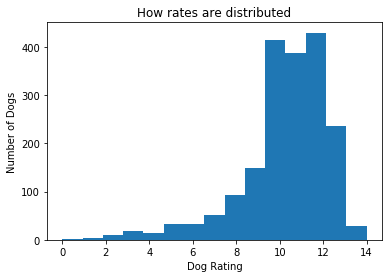

In [82]:
#Visualization of the rating histogram
df_clean['rating_numerator'].plot(kind = 'hist', bins = 15)
plt.title('How rates are distributed')
plt.ylabel('Number of Dogs')
plt.xlabel('Dog Rating');


### Insight #1 
The majority of the rates given are between 10 and 12 (not surprisingly because "they are good dogs")


8473.850368809273

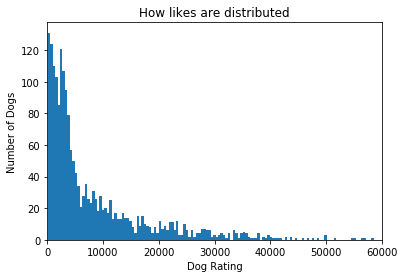

In [85]:
#Visualization of the likes histogram
df_clean['favorite_count'].plot(kind = 'hist', bins = 300)
plt.xlim(0, 60000)
plt.title('How likes are distributed')
plt.ylabel('Number of Dogs')
plt.xlabel('Dog Rating');

df_clean['favorite_count'].mean()

2517.2639620653317

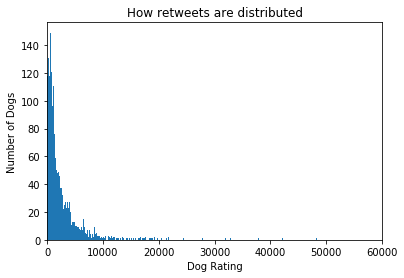

In [86]:
#Visualization of the retweets distribution
df_clean['retweet_count'].plot(kind = 'hist', bins = 300)
plt.xlim(0, 60000)
plt.title('How retweets are distributed')
plt.ylabel('Number of Dogs')
plt.xlabel('Dog Rating');

df_clean['retweet_count'].mean()

### Insight #2
The average number of likes per tweet is 8473

In [87]:
#Top breeds
df_clean.breed.value_counts().head(10)

golden_retriever      132
Labrador_retriever    88 
Pembroke              87 
Chihuahua             76 
pug                   54 
chow                  41 
toy_poodle            38 
Samoyed               37 
Pomeranian            36 
malamute              29 
Name: breed, dtype: int64

In [88]:
df_clean.groupby(['favorite_count','retweet_count','breed']).mean()

,,,tweet_id,rating_numerator,rating_denominator,confidence
favorite_count,retweet_count,breed,,,,
81,16,English_setter,666102155909144576,11,10,0.298617
107,23,curly-coated_retriever,666447344410484736,9,10,0.322084
111,41,miniature_pinscher,666049248165822464,5,10,0.560311
113,44,black-and-tan_coonhound,666407126856765440,7,10,0.529139
115,61,miniature_poodle,666058600524156928,8,10,0.201493
...,...,...,...,...,...,...
73397,19297,Labrador_retriever,830583320585068544,13,10,0.908703
85011,27680,golden_retriever,870374049280663552,13,10,0.841001
95450,42228,standard_poodle,819004803107983360,14,10,0.351308


### Insight #3
Lakeland_terriers seems to be the most popular type of dog and also for the channel manager, since the rates and the number of likes are also in line

-----
# END of DOC
Thanks for reviewing